In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("StartUp_Company_data.csv")
data.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
#Dependent or independent data
real_x = data.iloc[:,:-1].values
real_y = data.iloc[:,-1].values

In [4]:
#Encodeing the categorical data
ct = ColumnTransformer([("State",OneHotEncoder(),[3])],remainder="passthrough")
real_x = ct.fit_transform(real_x)

In [5]:
#avoiding Dummy variable Trap
real_x = real_x[:,1:]
real_x

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [0.0, 1.0, 86419.7

In [6]:
#Spliting the data 
training_x,test_x,training_y,test_y = train_test_split(real_x,real_y,test_size = 0.3,random_state = 25)

In [7]:
reg = LinearRegression()
reg.fit(training_x,training_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
y_pred = reg.predict(test_x)

In [9]:
y_pred

array([ 74844.91375583,  55289.11156139, 160870.94185956,  74741.23443112,
       130762.48537181, 150219.27212044,  87008.23895783,  98075.1099161 ,
        47246.17997271,  82235.80559612,  49363.72901484,  72877.3146408 ,
       183633.53357638, 114694.09021919, 134890.32273353])

In [10]:
test_y

array([ 90708.19,  49490.75, 155752.6 ,  77798.83, 125370.37, 132602.65,
        96712.8 ,  96778.92,  64926.08,  81005.76,  35673.41,  78239.91,
       191050.39, 105008.31, 144259.4 ])

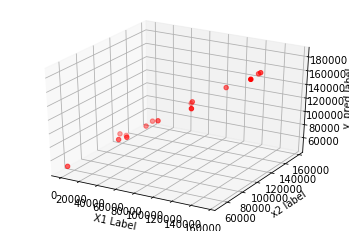

In [13]:

#Visualization
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax= fig.add_subplot(111,projection = '3d')
x1 = test_x[:,[2]]
x2 = test_x[:,[3]]
ax.scatter(x1,x2,y_pred,c = "r",marker = 'o')
ax.set_xlabel("X1 Label")
ax.set_ylabel("x2 label")
ax.set_zlabel("y_pred label")
plt.show()


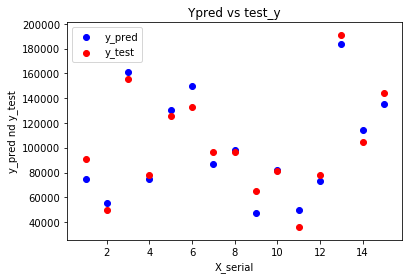

In [16]:
#y_pred VS #y_test
x_serial = list(range(1,len(y_pred)+1))
plt.scatter(x_serial , y_pred,color = "b")
plt.scatter(x_serial , test_y,color = "r")
plt.title("Ypred vs test_y")
plt.xlabel("X_serial")
plt.legend(["y_pred","y_test"])
plt.ylabel("y_pred nd y_test")
plt.show()